# LBP 테스트

In [5]:
import numpy as np 
from skimage.io import imread
import skimage.feature as feature 
import skimage.transform as transform
import matplotlib.pyplot as plt

In [69]:
ImageNDArray = imread("../data/FER2013/train/angry/Training_10595751.jpg", as_gray=True) 

LBP_default = feature.local_binary_pattern(ImageNDArray, 32, 2, method='default')
LBP_ror = feature.local_binary_pattern(ImageNDArray, 32, 2, method='ror')
LBP_uniform = feature.local_binary_pattern(ImageNDArray, 32, 2, method='uniform')
LBP_var = feature.local_binary_pattern(ImageNDArray, 32, 2, method='var')

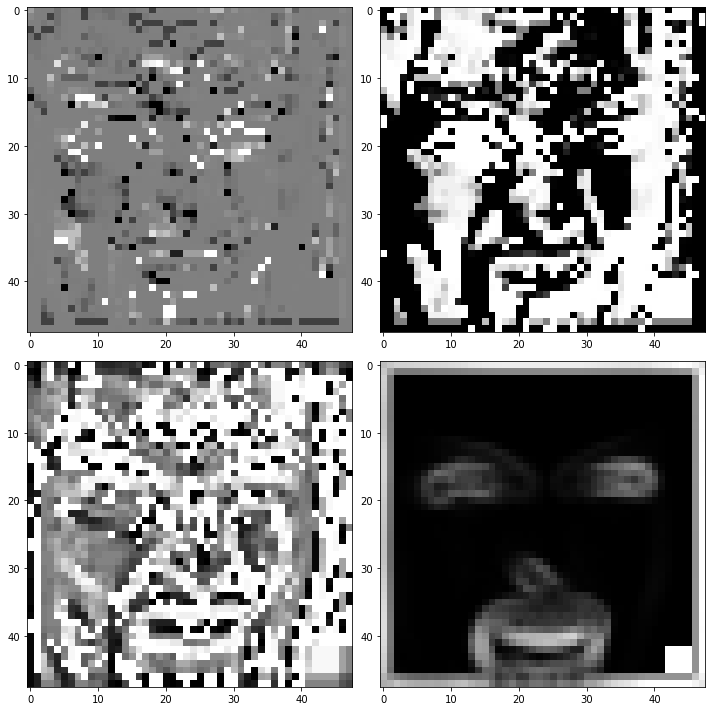

In [70]:
fig = plt.figure(figsize=(10, 10))
fig_1 = fig.add_subplot(2,2,1)
fig_2 = fig.add_subplot(2,2,2)
fig_3 = fig.add_subplot(2,2,3)
fig_4 = fig.add_subplot(2,2,4)

fig_1.imshow(LBP_default, cmap='gray')
fig_2.imshow(LBP_ror, cmap='gray')
fig_3.imshow(LBP_uniform, cmap='gray')
fig_4.imshow(LBP_var, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
ImageNDArray = imread("../data/telemoji/train/angry/0003334751eb7b1228d3ca0d382e31f66c2043809ecb0dd4308d9e13.jpg", as_gray=True) 

LBP_16 = feature.local_binary_pattern(ImageNDArray, 16, 2, method='default')
LBP_8 = feature.local_binary_pattern(ImageNDArray, 8, 2, method='default')
LBP_4 = feature.local_binary_pattern(ImageNDArray, 4, 2, method='default')
LBP_32 = feature.local_binary_pattern(ImageNDArray, 32, 2, method='default')

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig_1 = fig.add_subplot(2,2,1)
fig_2 = fig.add_subplot(2,2,2)
fig_3 = fig.add_subplot(2,2,3)
fig_4 = fig.add_subplot(2,2,4)

fig_1.imshow(LBP_16, cmap='gray')
fig_2.imshow(LBP_8, cmap='gray')
fig_3.imshow(LBP_4, cmap='gray')
fig_4.imshow(LBP_32, cmap='gray')

plt.tight_layout()
plt.show()

# LBP를 이용한 특성 추출

In [12]:
import os
import skimage.feature as feature 
import skimage.transform as transform
from PIL import Image
from skimage.io import imread
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [51]:
# train 폴더 변환
path_dir = '../data/FER2013/train'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname), as_gray=True)
        LBP = feature.local_binary_pattern(img, 8, 1, method='ror')
        
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/FER2013/LBP/train/{fname}/{iname.split('.')[0]}.jpg", 
                   LBP, cmap="gray")

  0%|          | 0/3995 [00:00<?, ?it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

  0%|          | 0/4097 [00:00<?, ?it/s]

  0%|          | 0/7215 [00:00<?, ?it/s]

  0%|          | 0/4965 [00:00<?, ?it/s]

  0%|          | 0/4830 [00:00<?, ?it/s]

  0%|          | 0/3171 [00:00<?, ?it/s]

In [52]:
# validation 폴더 변환
path_dir = '../data/FER2013/test'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname), as_gray=True)
        LBP = feature.local_binary_pattern(img, 8, 1, method='ror')
        
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/FER2013/LBP/test/{fname}/{iname.split('.')[0]}.jpg", 
                   LBP, cmap="gray")

  0%|          | 0/958 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1774 [00:00<?, ?it/s]

  0%|          | 0/1233 [00:00<?, ?it/s]

  0%|          | 0/1247 [00:00<?, ?it/s]

  0%|          | 0/831 [00:00<?, ?it/s]

# LBP를 이용한 학습

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import EfficientNetB3, ResNet50

In [48]:
base_dir = '../data/FER2013/LBP'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1/255,    
#     rotation_range=40,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
## 다른 모델

model = Sequential()
model.add(Conv2D(64, (1, 1), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 256)      

In [53]:
## 다른 모델 논문 참고 모델
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 128)      

In [54]:
history = model.fit(train_generator, steps_per_epoch=280, epochs=40,
                    validation_data=validation_generator,
                    validation_steps=71)

Epoch 1/40
280/280 [==============================] - 127s 453ms/step - loss: 1.9421 - accuracy: 0.2797 - val_loss: 2.5926 - val_accuracy: 0.1158
Epoch 2/40
280/280 [==============================] - 16s 57ms/step - loss: 1.5821 - accuracy: 0.3969 - val_loss: 1.8307 - val_accuracy: 0.2599
Epoch 3/40
280/280 [==============================] - 13s 47ms/step - loss: 1.4184 - accuracy: 0.4581 - val_loss: 1.4512 - val_accuracy: 0.4359
Epoch 4/40
280/280 [==============================] - 13s 46ms/step - loss: 1.3175 - accuracy: 0.4946 - val_loss: 1.3534 - val_accuracy: 0.4848
Epoch 5/40
280/280 [==============================] - 13s 46ms/step - loss: 1.2388 - accuracy: 0.5269 - val_loss: 1.2552 - val_accuracy: 0.5141
Epoch 6/40
280/280 [==============================] - 13s 46ms/step - loss: 1.1767 - accuracy: 0.5470 - val_loss: 1.2508 - val_accuracy: 0.5244
Epoch 7/40
280/280 [==============================] - 13s 46ms/step - loss: 1.1229 - accuracy: 0.5683 - val_loss: 1.2861 - val_accurac